# BÀI GIẢI ĐỀ THI CUỐI KHÓA - DATA PREPROCESSING AND DATA ANALYSIS
## Đề: DL04 - K309
## Dataset: housing-prices-dataset.csv
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

---
# PHẦN 1: ĐỌC DỮ LIỆU VÀ KIỂM TRA (1 điểm)
**Yêu cầu:**
- Đọc file housing-prices-dataset.csv
- Kiểm tra thông tin cơ bản (shape, info, head)
- Kiểm tra duplicate

In [3]:
# Đọc dữ liệu
df = pd.read_csv('housing-prices-dataset.csv')

In [4]:
# Kiểm tra shape
df.shape

(1460, 81)

In [5]:
# Xem 5 dòng đầu
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Kiểm tra thông tin
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Kiểm tra duplicate
df.duplicated().any()

np.False_

In [8]:
# Nếu có duplicate thì xóa
if df.duplicated().any():
    df.drop_duplicates(inplace=True)
    print(f"Đã xóa duplicate. Shape mới: {df.shape}")
else:
    print("Không có duplicate")

Không có duplicate


---
# PHẦN 2: EXPLORATORY DATA ANALYSIS (4.5 điểm)
**Chọn 11 biến để phân tích:**
- Biến định tính: LotShape, Street, HouseStyle
- Biến định lượng: LotArea, YearBuilt, 1stFlrSF, 2ndFlrSF, FullBath, BedroomAbvGr, TotRmsAbvGrd, SalePrice

In [9]:
# Chọn các biến cần phân tích
features = ['LotShape', 'Street', 'HouseStyle', 'LotArea', 'YearBuilt', 
            '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice']
df_analysis = df[features].copy()

In [10]:
df_analysis.dtypes

LotShape        object
Street          object
HouseStyle      object
LotArea          int64
YearBuilt        int64
1stFlrSF         int64
2ndFlrSF         int64
FullBath         int64
BedroomAbvGr     int64
TotRmsAbvGrd     int64
SalePrice        int64
dtype: object

## 2.1. Phân tích đơn biến (Univariate Analysis)

In [11]:
# Thống kê mô tả cho biến định lượng
df_analysis[['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 
              'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice']].describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808,180921.195890
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393,79442.502883
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000,34900.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000,129975.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000,163000.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000,214000.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000,755000.000000


In [19]:
# Phân tích biến định tính
print(df_analysis['LotShape'].value_counts())
print("\n")
print(df_analysis['Street'].value_counts())
print("\n")
print(df_analysis['HouseStyle'].value_counts())

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


Street
Pave    1454
Grvl       6
Name: count, dtype: int64


HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64


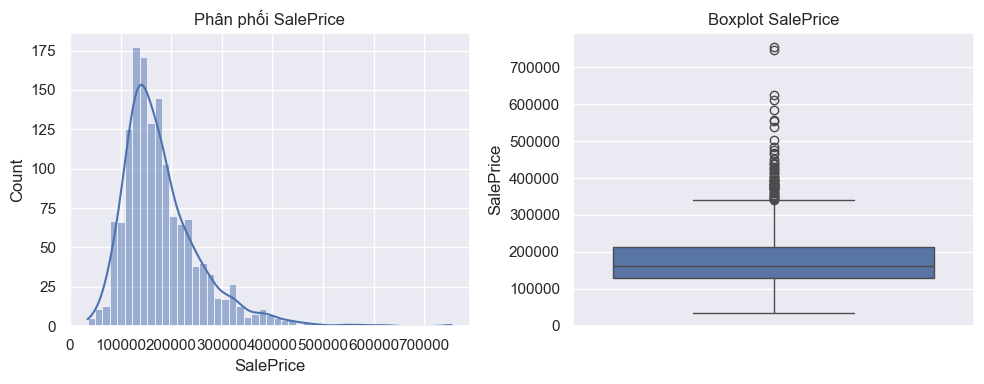

In [20]:
# Vẽ phân phối cho SalePrice
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=df_analysis, x='SalePrice', kde=True)
plt.title('Phân phối SalePrice')
plt.subplot(1,2,2)
sns.boxplot(data=df_analysis, y='SalePrice')
plt.title('Boxplot SalePrice')
plt.tight_layout()
plt.show()

In [ ]:
# Kiểm tra độ lệch
print('Skewness của SalePrice:', df_analysis['SalePrice'].skew())
# Nếu > 0: lệch phải, < 0: lệch trái

## 2.2. Phân tích đa biến (Multivariate Analysis)

In [ ]:
# Ma trận tương quan
corr_matrix = df_analysis[['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 
                            'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice']].corr()
corr_matrix

In [ ]:
# Vẽ heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Ma trận tương quan')
plt.show()

In [ ]:
# Tương quan với SalePrice
corr_with_price = corr_matrix['SalePrice'].sort_values(ascending=False)
print("Tương quan với SalePrice:")
print(corr_with_price)

In [ ]:
# Scatter plot với biến có tương quan cao nhất
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.scatterplot(data=df_analysis, x='1stFlrSF', y='SalePrice')
plt.title('1stFlrSF vs SalePrice')
plt.subplot(1,3,2)
sns.scatterplot(data=df_analysis, x='TotRmsAbvGrd', y='SalePrice')
plt.title('TotRmsAbvGrd vs SalePrice')
plt.subplot(1,3,3)
sns.scatterplot(data=df_analysis, x='YearBuilt', y='SalePrice')
plt.title('YearBuilt vs SalePrice')
plt.tight_layout()
plt.show()

In [ ]:
# Kiểm định Chi-square cho biến định tính
from scipy.stats import chi2_contingency

# H0: 2 biến độc lập
# Ha: 2 biến phụ thuộc

# LotShape vs HouseStyle
cross_tab = pd.crosstab(df_analysis['LotShape'], df_analysis['HouseStyle'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-square test: LotShape vs HouseStyle")
print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}")
if p < 0.05:
    print("=> Kết luận: 2 biến PHỤ THUỘC (có ý nghĩa thống kê)")
else:
    print("=> Kết luận: 2 biến ĐỘC LẬP")

In [ ]:
# Kiểm định ANOVA cho biến liên tục với biến phân loại
from scipy.stats import f_oneway

# H0: Không có sự khác biệt về trung bình giữa các nhóm
# Ha: Có sự khác biệt về trung bình giữa các nhóm

# SalePrice theo HouseStyle
groups = []
for name, group in df_analysis.groupby('HouseStyle'):
    groups.append(group['SalePrice'])

f_stat, p_value = f_oneway(*groups)
print(f"ANOVA test: SalePrice vs HouseStyle")
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("=> Kết luận: Có sự khác biệt ý nghĩa thống kê về SalePrice giữa các HouseStyle")
else:
    print("=> Kết luận: Không có sự khác biệt ý nghĩa thống kê")

In [ ]:
# Vẽ barplot để so sánh
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.barplot(data=df_analysis, x='LotShape', y='SalePrice', ci=None)
plt.title('SalePrice theo LotShape')
plt.subplot(1,3,2)
sns.barplot(data=df_analysis, x='Street', y='SalePrice', ci=None)
plt.title('SalePrice theo Street')
plt.subplot(1,3,3)
sns.barplot(data=df_analysis, x='HouseStyle', y='SalePrice', ci=None)
plt.xticks(rotation=45)
plt.title('SalePrice theo HouseStyle')
plt.tight_layout()
plt.show()

## 2.3. Xử lý Outliers

In [ ]:
# Phát hiện outliers bằng phương pháp IQR cho SalePrice
Q1 = df_analysis['SalePrice'].quantile(0.25)
Q2 = df_analysis['SalePrice'].quantile(0.50)
Q3 = df_analysis['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

print(f'Q1 (25%): {Q1:,.0f}')
print(f'Q2 (50% - median): {Q2:,.0f}')
print(f'Q3 (75%): {Q3:,.0f}')
print(f'IQR: {IQR:,.0f}')

In [ ]:
# Xác định upper whisker
w = 1.5
UW = Q3 + w * IQR
print(f'Upper Whisker: {UW:,.0f}')

In [ ]:
# Tìm các outliers
outliers = df_analysis[df_analysis['SalePrice'] > UW]
print(f"Số lượng outliers: {len(outliers)}")
print(f"Tỷ lệ outliers: {len(outliers)/len(df_analysis)*100:.2f}%")

In [ ]:
# Xóa outliers (nếu cần)
df_analysis.drop(index=outliers.index, inplace=True)
print(f"Shape sau khi xóa outliers: {df_analysis.shape}")

In [ ]:
# Kiểm tra lại boxplot
sns.boxplot(data=df_analysis, y='SalePrice')
plt.title('Boxplot SalePrice sau khi xóa outliers')
plt.show()

---
# PHẦN 3: FEATURE ENGINEERING (2 điểm)
**Yêu cầu:**
- Chọn các biến có tương quan >= 0.3 hoặc <= -0.3 với SalePrice
- Kiểm định p-value <= 0.05
- Chuẩn hóa biến định tính bằng OneHotEncoder
- Chuẩn hóa biến định lượng bằng StandardScaler

## 3.1. Chọn biến dựa trên tương quan và p-value

In [ ]:
# Chọn biến có |correlation| >= 0.3
from scipy.stats import pearsonr

quant_vars = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 
              'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

selected_features = []
for var in quant_vars:
    corr, pval = pearsonr(df_analysis[var], df_analysis['SalePrice'])
    print(f"{var:15s}: correlation={corr:6.3f}, p-value={pval:.4f}", end='')
    
    if abs(corr) >= 0.3 and pval <= 0.05:
        selected_features.append(var)
        print(" => CHỌN")
    else:
        print(" => Loại")

print(f"\nCác biến được chọn: {selected_features}")

## 3.2. Feature Engineering - Encoding và Scaling

In [ ]:
# Chuẩn bị X và y
qual_vars = ['LotShape', 'Street', 'HouseStyle']
X = df_analysis[qual_vars + selected_features].copy()
y = df_analysis['SalePrice'].copy()

In [ ]:
# OneHotEncoder cho biến định tính
from sklearn.preprocessing import OneHotEncoder

# Cách 1: Dùng pandas get_dummies
X_encoded = pd.get_dummies(X, columns=qual_vars, drop_first=True)
X_encoded.head()

In [ ]:
# StandardScaler cho biến định lượng
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_encoded[selected_features] = scaler.fit_transform(X_encoded[selected_features])

In [ ]:
# Kiểm tra kết quả
print("Shape của X sau encoding và scaling:", X_encoded.shape)
X_encoded.head()

In [ ]:
# Kiểm tra mean và std sau scaling (phải xấp xỉ 0 và 1)
print("Mean của các biến đã scale:")
print(X_encoded[selected_features].mean())
print("\nStd của các biến đã scale:")
print(X_encoded[selected_features].std())

---
# PHẦN 4: LINEAR REGRESSION MODEL (1.5 điểm)
**Yêu cầu:**
- Chia train/test với test_size=0.2
- Xây dựng Linear Regression model
- Đánh giá model (R², MSE, MAE)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
# Xây dựng model
lm = LinearRegression()
lm.fit(X_train, y_train)

In [ ]:
# Dự đoán
yhat_train = lm.predict(X_train)
yhat_test = lm.predict(X_test)

In [ ]:
# Đánh giá R²
print('The full R-square is:', lm.score(X_encoded, y))
print('The train R-square is:', lm.score(X_train, y_train))
print('The test R-square is:', lm.score(X_test, y_test))

In [ ]:
# Đánh giá MSE và MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('The train MSE:', mean_squared_error(y_train, yhat_train))
print('The test MSE:', mean_squared_error(y_test, yhat_test))
print('The train MAE:', mean_absolute_error(y_train, yhat_train))
print('The test MAE:', mean_absolute_error(y_test, yhat_test))

In [ ]:
# So sánh giá dự đoán và thực tế
plt.scatter(yhat_test, y_test, alpha=0.5)
plt.xlabel('Giá dự đoán')
plt.ylabel('Giá thực tế')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2)
plt.title('So sánh giá dự đoán vs thực tế (Test set)')
plt.show()

In [ ]:
# So sánh phân phối
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Train")
sns.distplot(yhat_train, hist=False, color="b", label="Predicted Train", ax=ax1)
plt.legend()
plt.title('Train Set')

plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", label="Actual Test")
sns.distplot(yhat_test, hist=False, color="b", label="Predicted Test", ax=ax2)
plt.legend()
plt.title('Test Set')

plt.tight_layout()
plt.show()

---
# PHẦN 5: CẢI TIẾN MODEL VỚI SELECTKBEST (1 điểm)
**Yêu cầu:**
- Sử dụng SelectKBest để chọn k features tốt nhất
- So sánh kết quả với model ban đầu

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Thử với k=5 (chọn 5 features tốt nhất)
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [ ]:
# Xem điểm số của các features
feature_scores = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Score': selector.scores_
})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("Top 10 features theo score:")
print(feature_scores.head(10))

In [ ]:
# Xem các features được chọn
selected_mask = selector.get_support()
selected_feature_names = X_encoded.columns[selected_mask].tolist()
print(f"\nCác features được chọn (k={selector.k}):")
for i, feat in enumerate(selected_feature_names, 1):
    print(f"{i}. {feat}")

In [ ]:
# Train model với features đã chọn
lm_selected = LinearRegression()
lm_selected.fit(X_train_selected, y_train)

In [ ]:
# Đánh giá model mới
print('=== Model với SelectKBest (k=5) ===')
print('Train R-square:', lm_selected.score(X_train_selected, y_train))
print('Test R-square:', lm_selected.score(X_test_selected, y_test))

yhat_test_selected = lm_selected.predict(X_test_selected)
print('Test MSE:', mean_squared_error(y_test, yhat_test_selected))
print('Test MAE:', mean_absolute_error(y_test, yhat_test_selected))

In [ ]:
# So sánh 2 models
print("\n=== SO SÁNH 2 MODELS ===")
print(f"Model ban đầu (tất cả features): R² = {lm.score(X_test, y_test):.4f}")
print(f"Model với SelectKBest (k=5): R² = {lm_selected.score(X_test_selected, y_test):.4f}")

In [ ]:
# Thử nghiệm với các giá trị k khác nhau
k_values = [3, 5, 7, 10]
results = []

for k in k_values:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_k = selector.fit_transform(X_train, y_train)
    X_test_k = selector.transform(X_test)
    
    lm_k = LinearRegression()
    lm_k.fit(X_train_k, y_train)
    
    r2_train = lm_k.score(X_train_k, y_train)
    r2_test = lm_k.score(X_test_k, y_test)
    
    results.append({'k': k, 'R²_train': r2_train, 'R²_test': r2_test})

results_df = pd.DataFrame(results)
print("\nKết quả với các giá trị k khác nhau:")
print(results_df)

In [ ]:
# Vẽ biểu đồ so sánh
plt.figure(figsize=(10,5))
plt.plot(results_df['k'], results_df['R²_train'], marker='o', label='Train R²')
plt.plot(results_df['k'], results_df['R²_test'], marker='s', label='Test R²')
plt.xlabel('Số lượng features (k)')
plt.ylabel('R²')
plt.title('R² theo số lượng features')
plt.legend()
plt.grid(True)
plt.show()

---
# KẾT LUẬN

## Tóm tắt kết quả:
1. **Phần 1**: Đã đọc và kiểm tra dữ liệu thành công, xử lý duplicate (nếu có)
2. **Phần 2**: 
   - Phân tích đơn biến: Xem phân phối, thống kê mô tả
   - Phân tích đa biến: Ma trận tương quan, kiểm định Chi-square, ANOVA
   - Xử lý outliers bằng phương pháp IQR
3. **Phần 3**: 
   - Chọn features dựa trên correlation >= 0.3 và p-value <= 0.05
   - OneHotEncoder cho biến định tính
   - StandardScaler cho biến định lượng
4. **Phần 4**: 
   - Xây dựng Linear Regression model
   - Đánh giá bằng R², MSE, MAE
   - Trực quan hóa kết quả
5. **Phần 5**: 
   - Cải tiến model bằng SelectKBest
   - So sánh với model ban đầu
   - Tìm giá trị k tối ưu

## Lưu ý quan trọng:
- Luôn kiểm tra duplicate và outliers trước khi modeling
- Chú ý đến tương quan giữa các biến để tránh multicollinearity
- So sánh R² giữa train và test để phát hiện overfitting
- SelectKBest giúp giảm số chiều và cải thiện model